In [1]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `loss` mode scenario of `Plot` class.

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.insert(0, '../..')
from glyf import plot

In [3]:
# Generate sample data

x = np.linspace(1, 100, 1000)

oscillation = lambda x: np.sin(x) / x + np.random.normal(scale=0.1, size=len(x))

y0 = -np.log(x) * .4 + oscillation(x)

To display a single curve use `Plot` in `'loss'` mode.

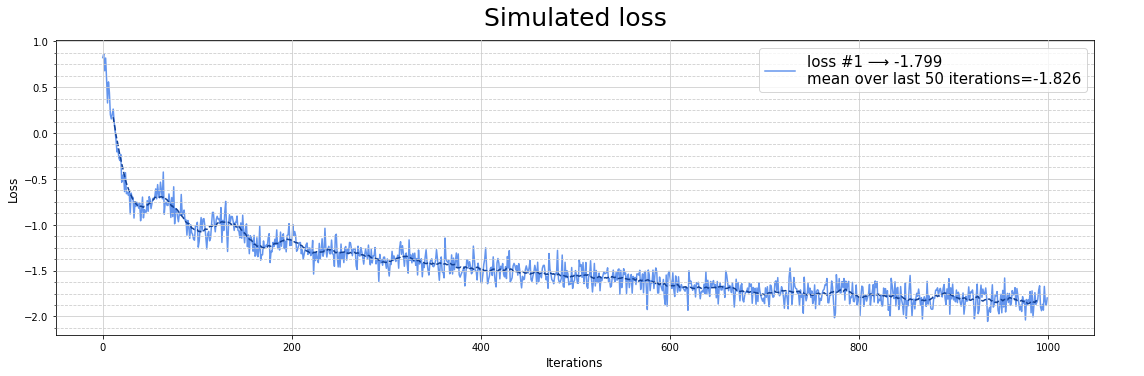

In [4]:
plot(
    data=y0,
    mode='loss',
    title='Simulated loss' 
)

To change rolling mean window size specify it in `window` parameter.

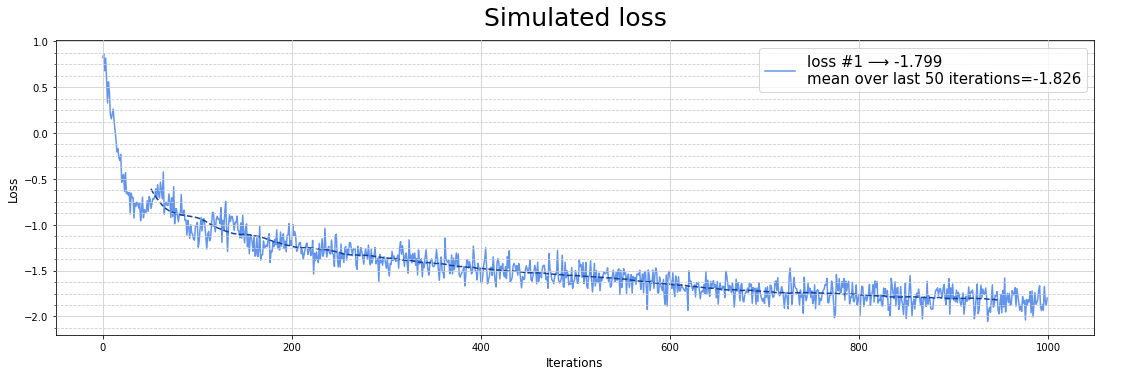

In [5]:
plot(
    data=y0,
    mode='loss',
    title='Simulated loss',
    window=100 # new parameter
)

To modify mean of last `n` iterations (displayed in legend window), address `final_window` parameter.

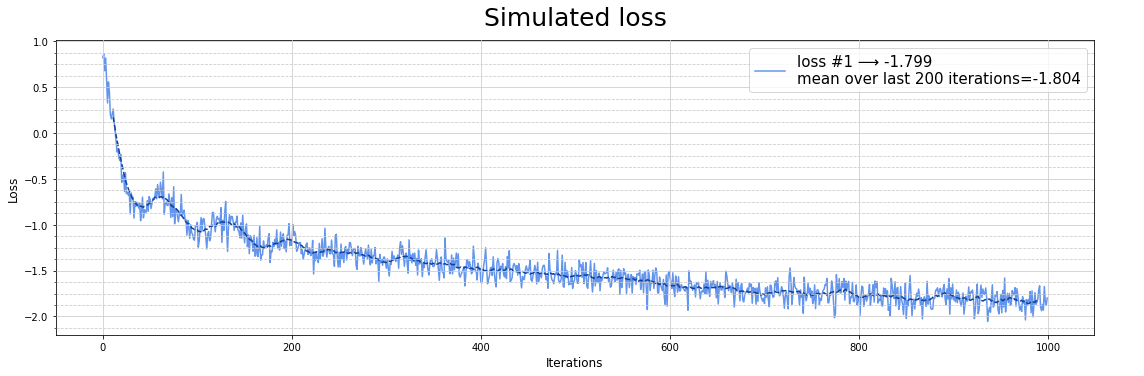

In [6]:
plot(
    data=y0,
    mode='loss',
    title='Simulated loss',
    final_window=200 # new parameter
)

One migh wish to display several losses simultaneously.

In [7]:
y1 = -np.log(x) * .6 + oscillation(x)

To achieve that provide arrays in a list.

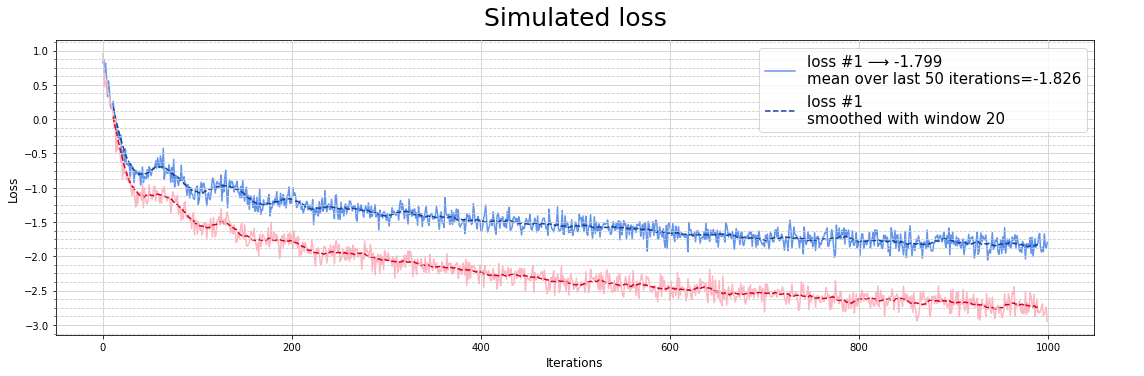

In [8]:
plot(
    data=[y0, y1], # parameter changed
    mode='loss',
    title='Simulated loss',
)

To display curves on separate plots use `combine='separate'`.

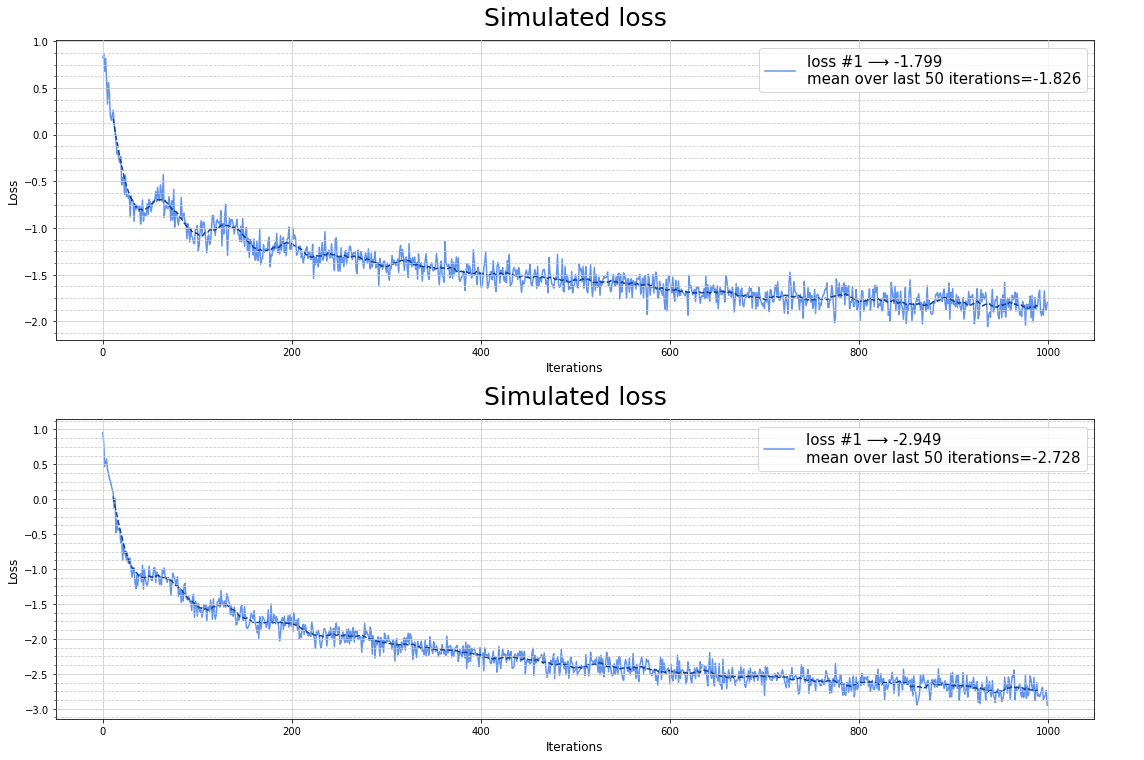

In [9]:
plot(
    data=[y0, y1],
    mode='loss',
    combine='separate', # new parameter
    title='Simulated loss',
)

Since separate subplots know nothing about each other's colors, they use the same color on their first layer.

To use different colors, provide them explicitly.

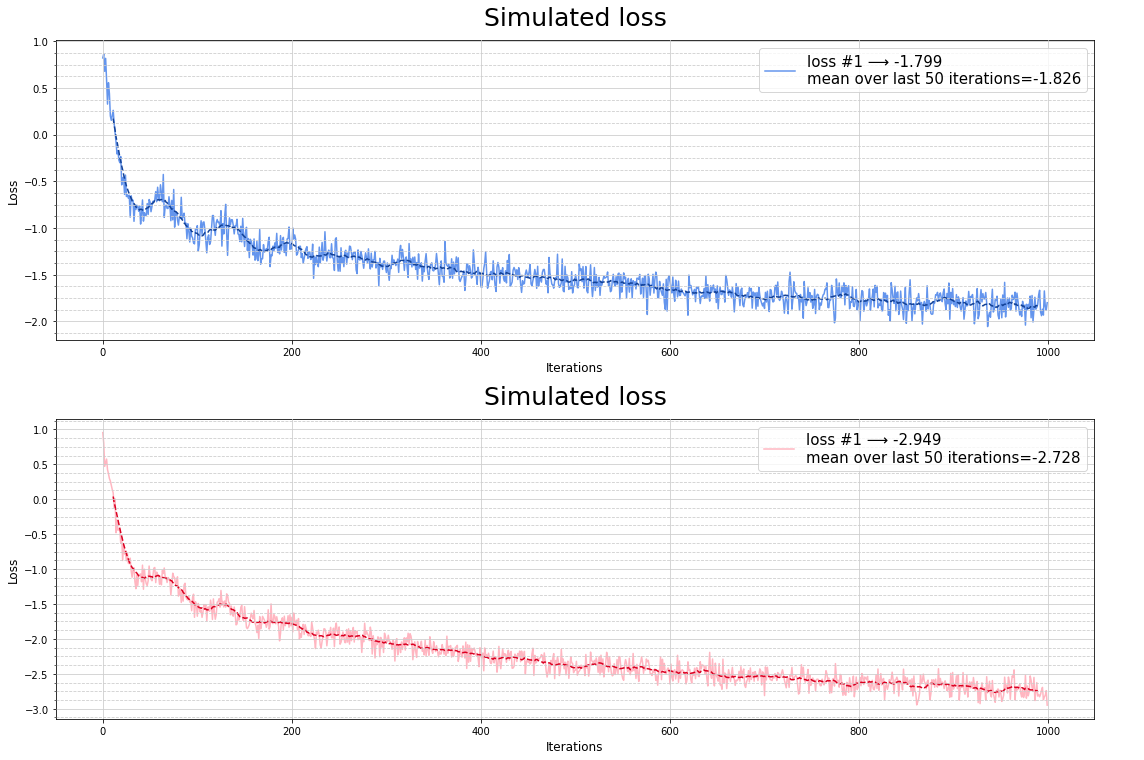

In [10]:
plot(
    data=[y0, y1],
    mode='loss',
    combine='separate',
    title='Simulated loss',
    color=['cornflowerblue', 'lightpink'] # new parameter
)

To display curves in ``'mixed'`` manner, i.e. with some curves overlaid and some displayed separately, use nested lists of arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

Note, that parameters should have same nestedness level.

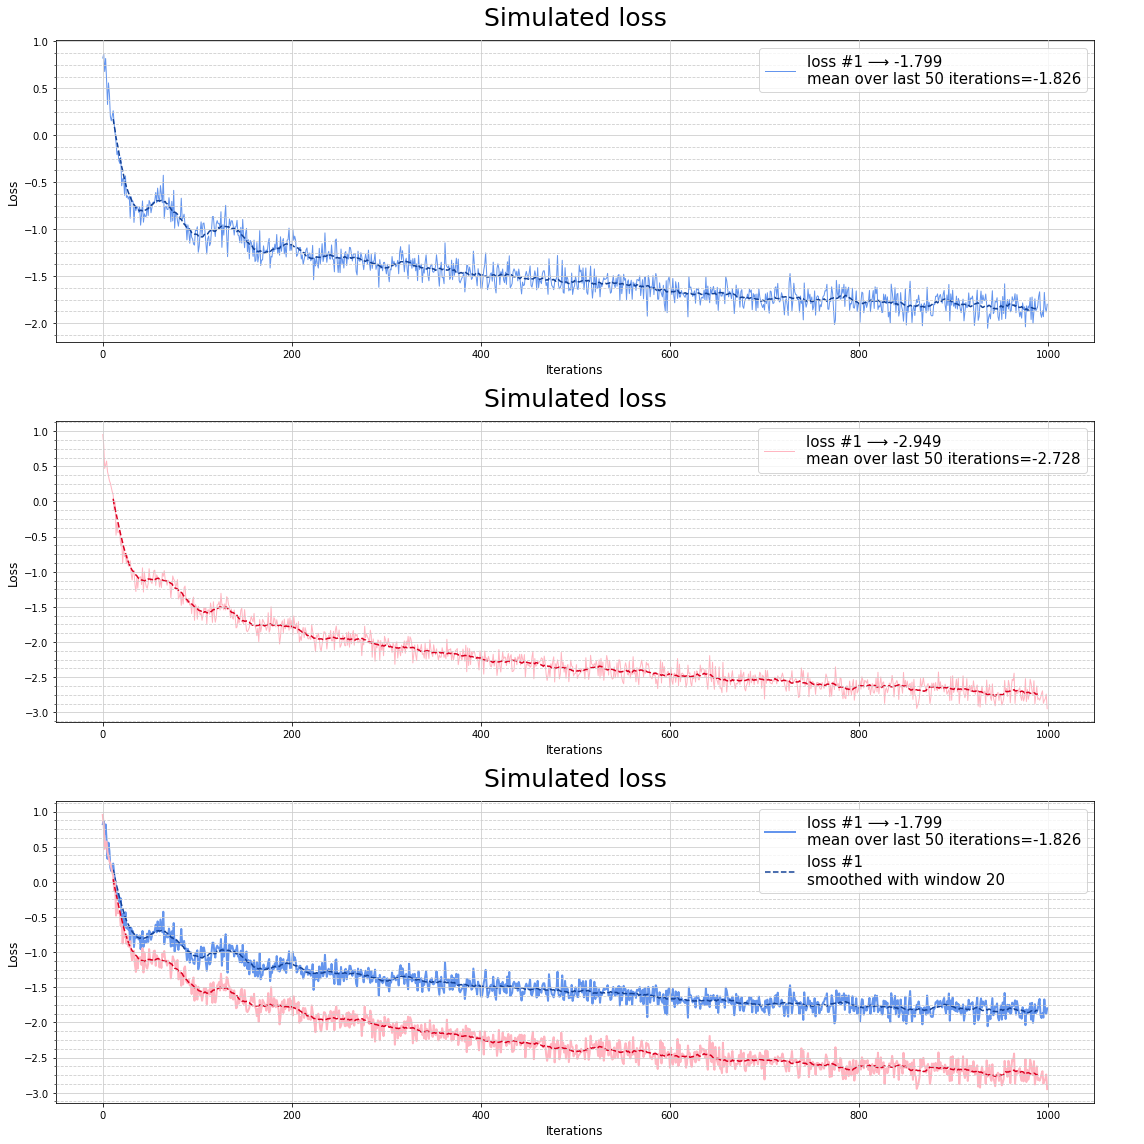

In [11]:
plot(
    data = [y0, y1, [y0, y1]], # parameter changed
    mode='loss',
    title='Simulated loss',
    color=['cornflowerblue', 'lightpink', ['cornflowerblue', 'lightpink']], # parameter changed
    linewidth=[1, 1, 2] # new parameter
)

### Display learning rate alongside with loss values

To display learning rate on the same plot with the loss simply provided it packed in the same tuple.

Since learning rate often decays exponentially, it might be usefull to log corresponding axis.

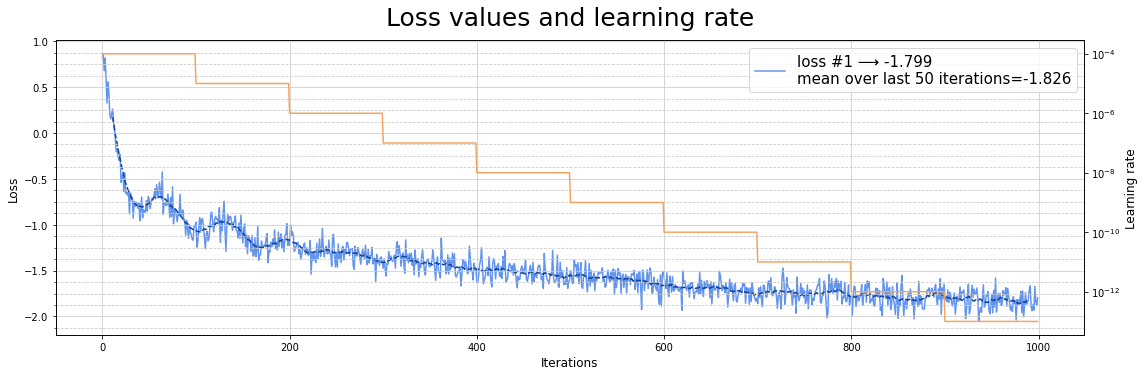

In [12]:
lr = np.full(len(x), 1e-3)
for i in range(0, len(x), 100):
    lr[i:] /= 10
    
plot(
    data=(y0, lr),
    mode='loss',
    log_lr=True
)